# Evaluate Classification model

- Classification model: Random Forest
- Evaluate __Classification metrics__ scores:
  - Accuracy Score
    - https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
  - Confusion Matrix
    - https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn-metrics-confusion-matrix
  - Precision Score
    - https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
  - Recall Score
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
  - F1 Score
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report


LOAD_DATA = load_breast_cancer()


def show_metrics_scores(
    train_metrics_score: float | str,
    test_metrics_score: float | str,
    title: str
) -> None:
    print(f'{title}')
    print(
        f'Train:\n{train_metrics_score}'
    )
    print(
        f'Test:\n{test_metrics_score}'
    )


In [2]:
# Prepare dataset.
df = pd.DataFrame(
    LOAD_DATA.data,
    columns=LOAD_DATA.feature_names
)
df['y'] = LOAD_DATA.target

# Split the data into Explanatory and Objective variables.
X = df[
    ['mean radius', 'mean texture']
]
y = df['y']

# Split dataset into training and test data.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)

print(X_test)

     mean radius  mean texture
512       13.400         20.52
457       13.210         25.25
439       14.020         15.66
298       14.260         18.17
37        13.030         18.42
..           ...           ...
7         13.710         20.83
408       17.990         20.66
523       13.710         18.68
361       13.300         21.57
553        9.333         21.94

[171 rows x 2 columns]


In [3]:
# Construct Random Forest classification model.
rf_classifier = RandomForestClassifier(
    max_depth=3,
    random_state=0
).fit(
    X_train,
    y_train
)

# Calculate predicted values.
y_train_prediction = rf_classifier.predict(X_train)
y_test_prediction = rf_classifier.predict(X_test)

In [4]:
# Check Accuracy Scores.
train_accuracy_score = accuracy_score(
    y_train,
    y_train_prediction
)
test_accuracy_score = accuracy_score(
    y_test,
    y_test_prediction
)

show_metrics_scores(
    train_accuracy_score,
    test_accuracy_score,
    'Accuracy Scores'
)

Accuracy Scores
Train:
0.9195979899497487
Test:
0.8888888888888888


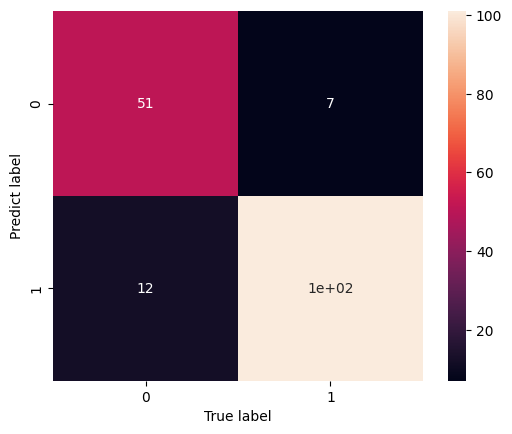

In [5]:
# Check Confusion Matrix.
matrix = confusion_matrix(
    y_test,
    y_test_prediction
)

sns.heatmap(
    matrix.T,
    square=True,
    annot=True
)
plt.xlabel('True label')
plt.ylabel('Predict label')
plt.show()

In [6]:
# Check Precision Scores.
train_precision_score = precision_score(
    y_train,
    y_train_prediction,
    pos_label=0
)
test_precision_score = precision_score(
    y_test,
    y_test_prediction,
    pos_label=0
)

show_metrics_scores(
    train_precision_score,
    test_precision_score,
    'Precision Scores'
)

Precision Scores
Train:
0.9534883720930233
Test:
0.8793103448275862


In [7]:
# Check Recall Scores.
train_recall_score = recall_score(
    y_train,
    y_train_prediction,
    pos_label=0
)
test_recall_score = recall_score(
    y_test,
    y_test_prediction,
    pos_label=0
)

show_metrics_scores(
    train_recall_score,
    test_recall_score,
    'Recall Scores'
)

Recall Scores
Train:
0.825503355704698
Test:
0.8095238095238095


In [8]:
# Check F1 Scores.
train_f1_score = f1_score(
    y_train,
    y_train_prediction,
    pos_label=0
)
test_f1_score = f1_score(
    y_test,
    y_test_prediction,
    pos_label=0
)

show_metrics_scores(
    train_f1_score,
    test_f1_score,
    'F1 Scores'
)

F1 Scores
Train:
0.8848920863309353
Test:
0.8429752066115702


In [9]:
# Show various classification metrics scores report.
train_classification_report = classification_report(
    y_train,
    y_train_prediction
)
test_classification_report = classification_report(
    y_test,
    y_test_prediction
)

show_metrics_scores(
    train_classification_report,
    test_classification_report,
    'Classification Report'
)

Classification Report
Train:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88       149
           1       0.90      0.98      0.94       249

    accuracy                           0.92       398
   macro avg       0.93      0.90      0.91       398
weighted avg       0.92      0.92      0.92       398

Test:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        63
           1       0.89      0.94      0.91       108

    accuracy                           0.89       171
   macro avg       0.89      0.87      0.88       171
weighted avg       0.89      0.89      0.89       171

